# ACA CAPSTONE

In [23]:
# Import necessary libraries(not only :D)
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## Explarotary Data Analysis

In [24]:
# Read and visualize our data
data = pd.read_csv('data/listings.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,365,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.29,2,171,0,NaN
2,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,235,28,3,2022-08-10,0.03,1,34,1,NaN
3,5178,Rental unit in New York · ★4.26 · 1 bedroom · ...,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,30,599,2023-07-21,3.45,1,5,52,NaN
4,5203,Rental unit in New York · ★4.91 · 1 bedroom · ...,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.70,1,0,0,NaN


### Analyze our data(see max, mean etc. and the types of our columns with number of missing)

In [3]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.358200e+04,4.358200e+04,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,32979.000000,43582.000000,43582.000000,43582.000000,0.0
mean,2.721035e+17,1.570982e+08,40.728560,-73.943897,212.093640,19.105112,26.971915,1.195271,33.274333,139.080194,7.946928,NaN
std,3.715468e+17,1.665669e+08,0.057508,0.056272,464.929732,27.464309,58.089120,1.741581,105.194622,139.450271,17.149248,NaN
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.058478e+07,1.664358e+07,40.687617,-73.981890,80.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000,NaN
50%,4.610849e+07,7.993739e+07,40.724520,-73.952730,135.000000,30.000000,5.000000,0.510000,1.000000,89.000000,0.000000,NaN
75%,6.983647e+17,2.841224e+08,40.762710,-73.924075,225.000000,30.000000,26.000000,1.740000,5.000000,280.000000,8.000000,NaN
max,9.502871e+17,5.295553e+08,40.911380,-73.713650,30000.000000,1250.000000,2054.000000,78.980000,586.000000,365.000000,741.000000,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43582 entries, 0 to 43581
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43582 non-null  int64  
 1   name                            43582 non-null  object 
 2   host_id                         43582 non-null  int64  
 3   host_name                       43577 non-null  object 
 4   neighbourhood_group             43582 non-null  object 
 5   neighbourhood                   43582 non-null  object 
 6   latitude                        43582 non-null  float64
 7   longitude                       43582 non-null  float64
 8   room_type                       43582 non-null  object 
 9   price                           43582 non-null  int64  
 10  minimum_nights                  43582 non-null  int64  
 11  number_of_reviews               43582 non-null  int64  
 12  last_review                     

In [5]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10603
reviews_per_month                 10603
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43582
dtype: int64

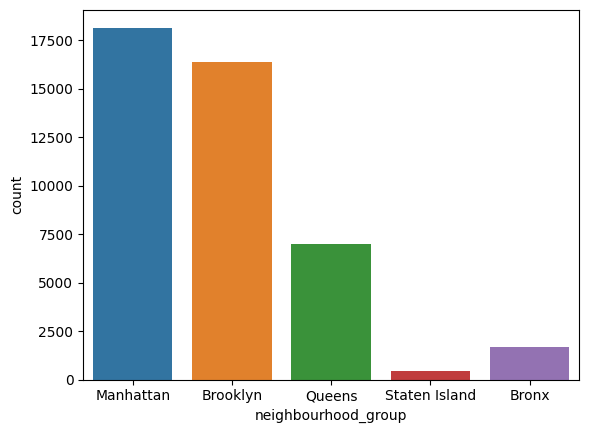

In [6]:
sns.countplot(data=data, x='neighbourhood_group')
plt.show()

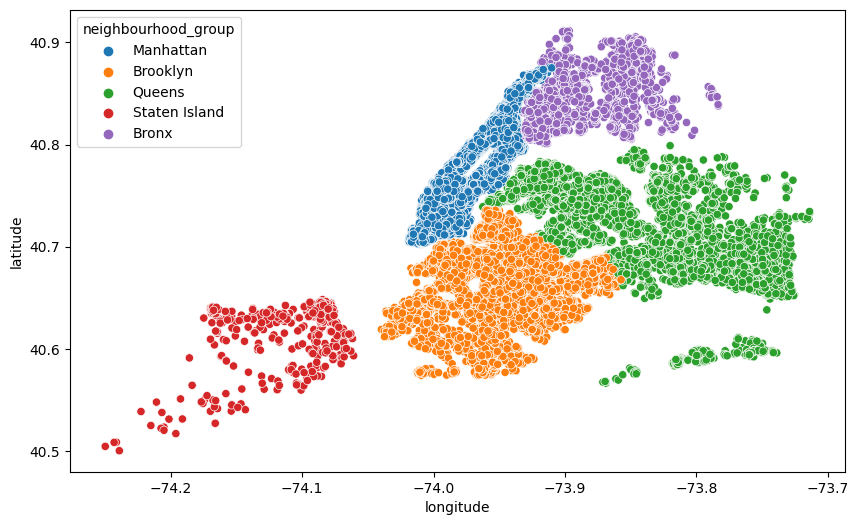

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='longitude',y='latitude',hue='neighbourhood_group')
plt.show()

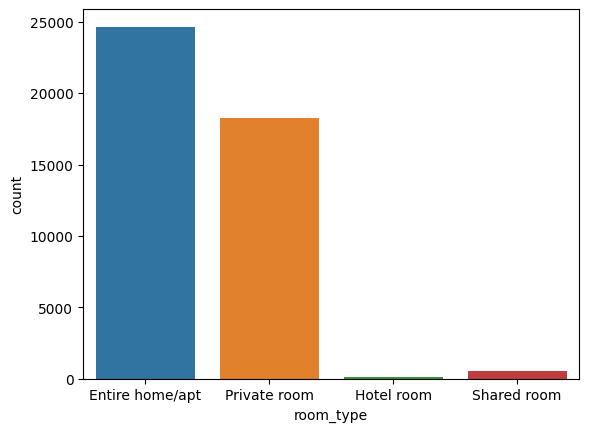

In [8]:
sns.countplot(data=data, x='room_type')
plt.show()

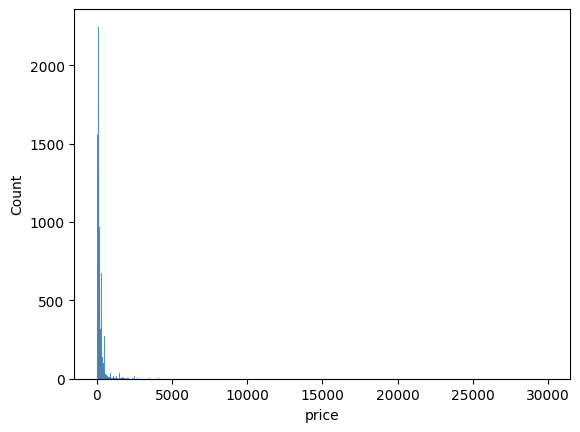

In [9]:
sns.histplot(data=data, x='price')
plt.show()

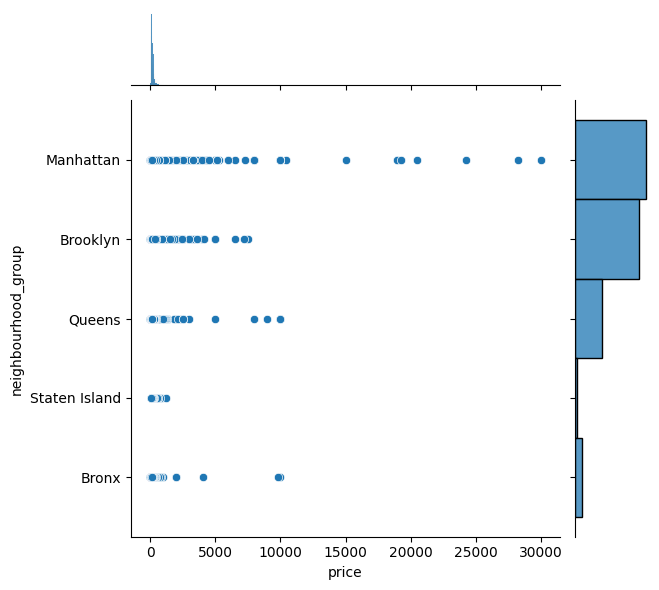

In [10]:
sns.jointplot(data=data, x='price', y=data['neighbourhood_group'])
plt.show()

### Feature Engineering

In [ ]:
# Create new features using info from name
data['rating'] = data['name'].str.extract(r'★([\d.]+)').astype('float')  # Extract the rating
data['bedrooms'] = data['name'].str.extract(r'(\d+) (?:bedroom|bed)').astype('float')  # Extract the number of bedrooms
data['mean_price_neighbourhood'] = data.groupby('neighbourhood_group')['price'].transform('mean')

# Drop columns that don't make sense to the prediction and dividing our data
X = data.drop(['price','id', 'host_id', 'host_name', 'last_review'], axis=1)
y = data['price']


In [ ]:
numerical_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'rating', 'bedrooms', 'mean_price_neighbourhood']

categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median imputation
    ('scaler', StandardScaler())  # Scale the features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with mode imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
# Split data to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0., random_state=42)

### Comparing different models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from main import OurRegression

# First model is Linear Regression
model = LinearRegression()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV error", -mse_scores.mean())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# 

In [34]:
# Second model is Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=100)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV error", -mse_scores.mean())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

KeyboardInterrupt: 

In [22]:
# Third model is Our Implemented Linear Regression, but it doesn't work with pipeline :D
# model = OurRegression()

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', model)
# ])

# mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
# print("CV error", -mse_scores.mean())

# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = math.sqrt(mse)
# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")